In [75]:
# Importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm

In [55]:
# Read in the data
df = pd.read_csv('/Users/helenamabey/Stats_Spring_2025/Congestion.csv')
df.head()

,Date,Year,Month,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
0,2005-01,2005,Jan,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
1,2005-02,2005,Feb,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2,2005-03,2005,Mar,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
3,2005-04,2005,Apr,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
4,2005-05,2005,May,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [57]:
# Review the data, confirm no nulls and all data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        146 non-null    object 
 1   Year                        146 non-null    int64  
 2   Month                       146 non-null    object 
 3   Daily Vehicle Count         146 non-null    int64  
 4   Regular Gas Price Average   146 non-null    float64
 5   Midgrade Gas Price Average  146 non-null    float64
 6   Premium Gas Price Average   146 non-null    float64
 7   Monthly_Max_Temp            146 non-null    float64
 8   Monthly_Min_Temp            146 non-null    float64
 9   Monthly_Sum_Precipitation   146 non-null    float64
 10  Monthly_Snowfall            146 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 12.7+ KB


In [59]:
# Convert Date to datatime data type
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Year,Month,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
0,2005-01-01,2005,Jan,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
1,2005-02-01,2005,Feb,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2,2005-03-01,2005,Mar,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
3,2005-04-01,2005,Apr,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
4,2005-05-01,2005,May,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [61]:
# Convert Month and Year to Month-Year format (ChatGPT)
df['Month Year'] = df['Date'].dt.to_period('M')

df.head()

,Date,Year,Month,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall,Month Year
0,2005-01-01,2005,Jan,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0,2005-01
1,2005-02-01,2005,Feb,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5,2005-02
2,2005-03-01,2005,Mar,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0,2005-03
3,2005-04-01,2005,Apr,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0,2005-04
4,2005-05-01,2005,May,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0,2005-05


In [63]:
# Check out the data again to confirm data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        146 non-null    datetime64[ns]
 1   Year                        146 non-null    int64         
 2   Month                       146 non-null    object        
 3   Daily Vehicle Count         146 non-null    int64         
 4   Regular Gas Price Average   146 non-null    float64       
 5   Midgrade Gas Price Average  146 non-null    float64       
 6   Premium Gas Price Average   146 non-null    float64       
 7   Monthly_Max_Temp            146 non-null    float64       
 8   Monthly_Min_Temp            146 non-null    float64       
 9   Monthly_Sum_Precipitation   146 non-null    float64       
 10  Monthly_Snowfall            146 non-null    float64       
 11  Month Year                  146 non-null    period[M]     

In [65]:
# Reorder columns to move Month Year to the first column
df = df[['Month Year'] + [col for col in df.columns if col != 'Month Year']]

df.head()

,Month Year,Date,Year,Month,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
0,2005-01,2005-01-01,2005,Jan,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
1,2005-02,2005-02-01,2005,Feb,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2,2005-03,2005-03-01,2005,Mar,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
3,2005-04,2005-04-01,2005,Apr,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
4,2005-05,2005-05-01,2005,May,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [69]:
# Remove month and year fields prior to correlation review
df.pop('Year')
df.pop('Month')
df.head()

,Month Year,Date,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
0,2005-01,2005-01-01,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
1,2005-02,2005-02-01,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2,2005-03,2005-03-01,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
3,2005-04,2005-04-01,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
4,2005-05,2005-05-01,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [71]:
# Check the data for obvious trends. Snowfall is showing a strong right-skew based on mean and median values
df.describe()

,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,23604.958904,2.798003,2.937860,3.070890,51.568493,23.796575,1.862877,13.247945
std,3392.757418,0.612065,0.596528,0.585927,17.499666,12.925380,0.881182,15.851976
min,18208.000000,1.590000,1.702500,1.812500,23.600000,1.200000,0.170000,0.000000
25%,20696.500000,2.232000,2.437500,2.648125,36.000000,12.625000,1.222500,0.000000
50%,22957.000000,2.770000,2.891500,3.003750,51.200000,24.450000,1.810000,6.750000
75%,26287.750000,3.392500,3.510625,3.635000,68.525000,35.175000,2.427500,21.400000
max,33354.000000,3.995000,4.112500,4.225000,79.700000,45.200000,3.970000,57.000000


In [73]:
# Review correlation. Min and Max temp show a strong positive correlation. Snowfall is moderately correlated.
# Still would like to test some gas price values in the model
df.corr()

/var/folders/tb/9ztd83zd25xb9w5xfq415x100000gn/T/ipykernel_36812/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
Daily Vehicle Count,1.000000,0.116771,0.146964,0.175799,0.823199,0.819662,-0.034294,-0.583019
Regular Gas Price Average,0.116771,1.000000,0.997028,0.988014,0.359248,0.334312,-0.013109,-0.243885
Midgrade Gas Price Average,0.146964,0.997028,1.000000,0.996939,0.367900,0.344863,-0.013135,-0.244603
Premium Gas Price Average,0.175799,0.988014,0.996939,1.000000,0.373319,0.352280,-0.012910,-0.242776
Monthly_Max_Temp,0.823199,0.359248,0.367900,0.373319,1.000000,0.984329,-0.061773,-0.747067
Monthly_Min_Temp,0.819662,0.334312,0.344863,0.352280,0.984329,1.000000,0.020042,-0.724182
Monthly_Sum_Precipitation,-0.034294,-0.013109,-0.013135,-0.012910,-0.061773,0.020042,1.000000,0.384635
Monthly_Snowfall,-0.583019,-0.243885,-0.244603,-0.242776,-0.747067,-0.724182,0.384635,1.000000


In [229]:
correlation_max = df[['Daily Vehicle Count', 'Monthly_Max_Temp']].corr()
correlation_max

,Daily Vehicle Count,Monthly_Max_Temp
Daily Vehicle Count,1.000000,0.823199
Monthly_Max_Temp,0.823199,1.000000


In [231]:
correlation_min = df[['Daily Vehicle Count', 'Monthly_Min_Temp']].corr()
correlation_min

,Daily Vehicle Count,Monthly_Min_Temp
Daily Vehicle Count,1.000000,0.819662
Monthly_Min_Temp,0.819662,1.000000


In [233]:
correlation_gas = df[['Daily Vehicle Count', 'Regular Gas Price Average']].corr()
correlation_gas

,Daily Vehicle Count,Regular Gas Price Average
Daily Vehicle Count,1.000000,0.116771
Regular Gas Price Average,0.116771,1.000000


In [77]:
# Set Date as index for modeling and visualizations
df.set_index('Date', inplace=True)  # Set it as time series index
df.head()

,Month Year,Daily Vehicle Count,Regular Gas Price Average,Midgrade Gas Price Average,Premium Gas Price Average,Monthly_Max_Temp,Monthly_Min_Temp,Monthly_Sum_Precipitation,Monthly_Snowfall
Date,,,,,,,,,
2005-01-01,2005-01,19470,1.7660,1.8760,1.9800,32.3,12.7,2.29,36.0
2005-02-01,2005-02,21207,1.8550,1.9650,2.0650,33.9,10.5,2.14,37.5
2005-03-01,2005-03,22943,2.0825,2.1900,2.2875,39.5,17.5,1.49,20.0
2005-04-01,2005-04,21288,2.2300,2.3425,2.4450,49.9,24.0,2.24,20.0
2005-05-01,2005-05,23505,2.1540,2.2640,2.3640,62.1,30.5,1.01,2.0


In [79]:
# Select features (independent variables) and dependent variable
X = df[['Regular Gas Price Average', 'Midgrade Gas Price Average', 'Premium Gas Price Average',
        'Monthly_Max_Temp', 'Monthly_Min_Temp', 'Monthly_Sum_Precipitation', 'Monthly_Snowfall']]

y = df['Daily Vehicle Count']  # Dependent variable

In [81]:
# Train-test split (train up to 2016, test 2017)
train_mask = df.index.year < 2017
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

In [83]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [85]:
# Predict on test set, 2017-split between years, not a good indicator. Will try 70/30 split
y_pred = model.predict(X_test)

In [87]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:\n MAE: {mae:.2f}\n R² Score: {r2:.4f}")

Model Performance:
 MAE: 1245.69
 R² Score: -1.8582


In [89]:
# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train).fit()

In [91]:
# Model summary
model_summary = model_sm.summary()
print(model_summary)
# Very overfit with multicollearity relationships between the independent variables

                                 OLS Regression Results                                 
Dep. Variable:     Daily Vehicle Count   R-squared (uncentered):                   0.994
Model:                             OLS   Adj. R-squared (uncentered):              0.993
Method:                  Least Squares   F-statistic:                              3052.
Date:                 Fri, 07 Mar 2025   Prob (F-statistic):                   4.81e-147
Time:                         19:16:10   Log-Likelihood:                         -1291.8
No. Observations:                  144   AIC:                                      2598.
Df Residuals:                      137   BIC:                                      2618.
Df Model:                            7                                                  
Covariance Type:             nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
# Proves the multicollinearity in this model

                      Feature            VIF
0   Regular Gas Price Average  183905.254521
1  Midgrade Gas Price Average  833512.715877
2   Premium Gas Price Average  235561.609059
3            Monthly_Max_Temp     180.968225
4            Monthly_Min_Temp      97.531866
5   Monthly_Sum_Precipitation       8.562524
6            Monthly_Snowfall       5.428794


In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Add a constant column for VIF calculation
X_vif = sm.add_constant(X)

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)
# Even adding in the constant, this model is not successful

                      Feature           VIF
0                       const    124.316845
1   Regular Gas Price Average   8603.709217
2  Midgrade Gas Price Average  33465.881552
3   Premium Gas Price Average   8313.528987
4            Monthly_Max_Temp     43.278251
5            Monthly_Min_Temp     44.468607
6   Monthly_Sum_Precipitation      1.804832
7            Monthly_Snowfall      3.254614


In [105]:
df.to_csv('/Users/helenamabey/Stats_Spring_2025/Congestion Cleaned.csv')

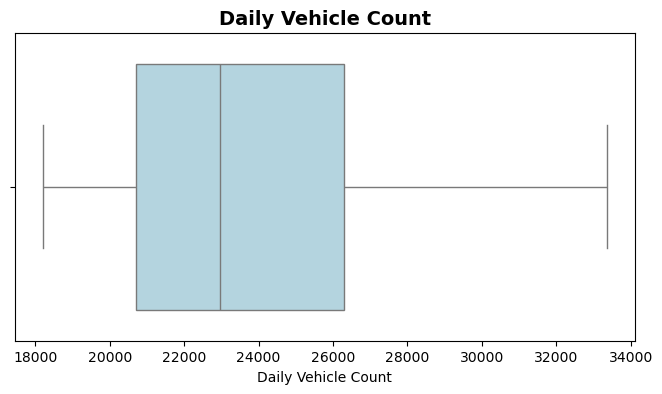

In [109]:
import seaborn as sns
# Boxplot for Daily Vehicle Count. Slight right-skew for the count data, could indicate some outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Daily Vehicle Count"], color="lightblue")
plt.title("Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

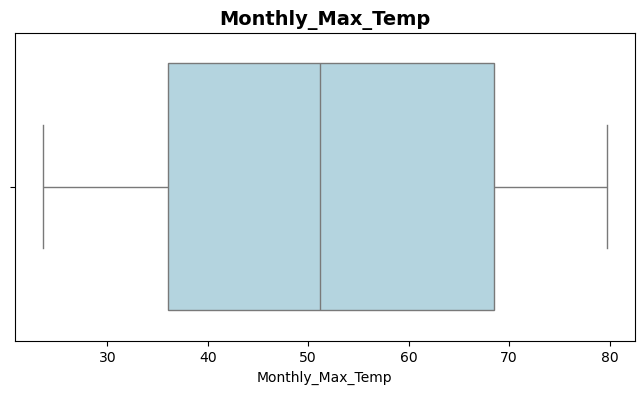

In [111]:
# Boxplot for Monthly_Max_Temp. This distribution is nearly normal with a very slight right-skew
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Monthly_Max_Temp"], color="lightblue")
plt.title("Monthly_Max_Temp", fontsize=14, fontweight='bold')
plt.show()

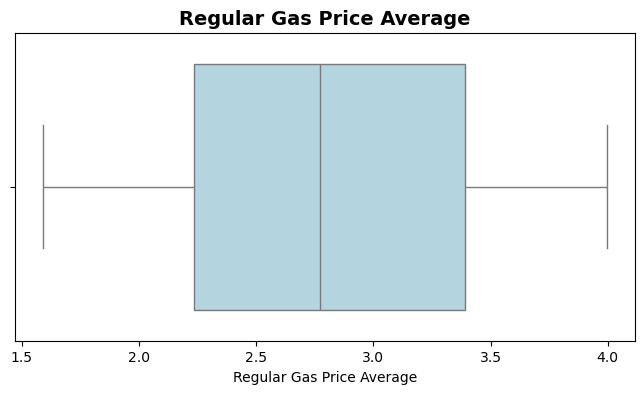

In [113]:
# Boxplot for Regular Gas Price Average. This distribution is nearly normal with a very slight right-skew
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Regular Gas Price Average"], color="lightblue")
plt.title("Regular Gas Price Average", fontsize=14, fontweight='bold')
plt.show()

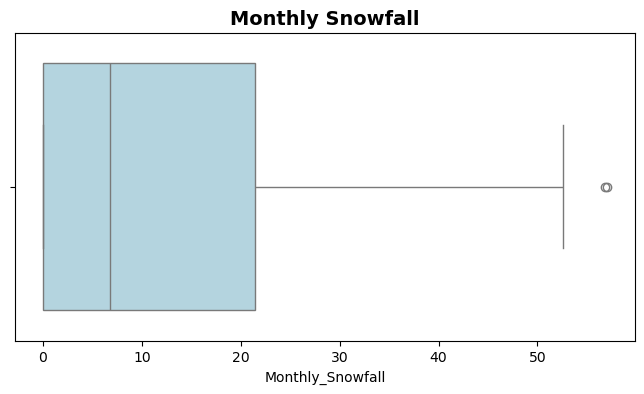

In [151]:
# Boxplot for Monthly Snowfall. This confirms the previously indication that the distribution is very right-skewed
# with some strong outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Monthly_Snowfall"], color="lightblue")
plt.title("Monthly Snowfall", fontsize=14, fontweight='bold')
plt.show()

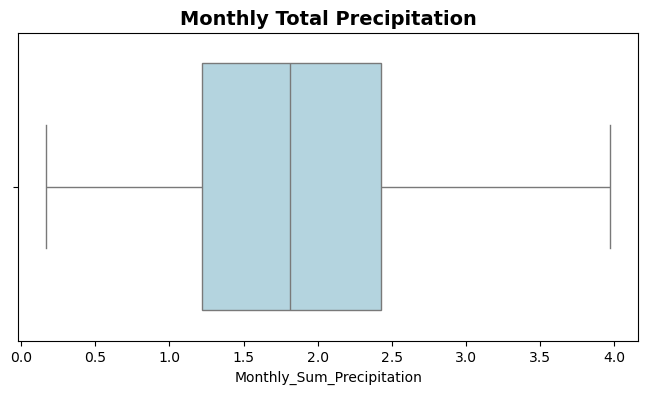

In [244]:
# Boxplot for Monthly_Sum_Precipitation. This shows a relatively normal distribution of total precipitation amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Monthly_Sum_Precipitation"], color="lightblue")
plt.title("Monthly Total Precipitation", fontsize=14, fontweight='bold')
plt.show()

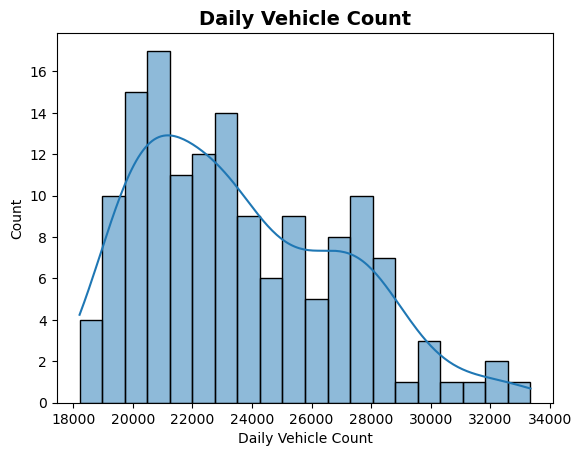

In [165]:
# Histogram for Daily Vehicle Count which is the dependent variable. Confirms again the right-skewed distribution
sns.histplot(data=df, x=df['Daily Vehicle Count'], kde=True, bins=20, element="bars")
plt.title("Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

In [209]:
df["Daily Vehicle Count"].kurt()

-0.37514972255977286

In [211]:
df["Daily Vehicle Count"].skew()

0.6271467490447601

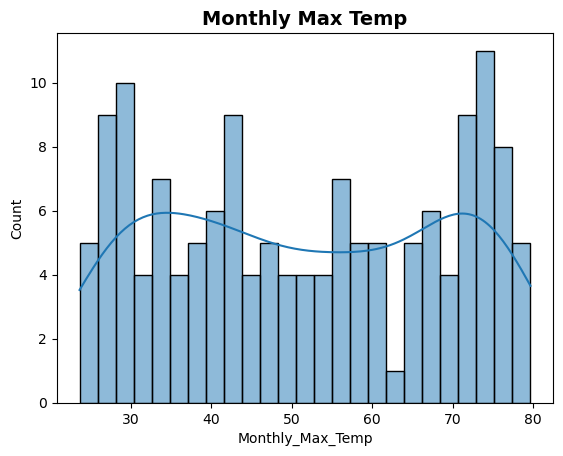

In [203]:
# Histogram for Monthly Max Temp which is an independent variable. This variable seems flatly distributed. Will review kurtosis value, which
# should be under 3
sns.histplot(data=df, x=df['Monthly_Max_Temp'], kde=True, bins=25, element="bars")
plt.title("Monthly Max Temp", fontsize=14, fontweight='bold')
plt.show()

In [205]:
df["Monthly_Max_Temp"].kurt()

-1.4059379564006056

In [207]:
df["Monthly_Max_Temp"].skew()

0.026509500308662615

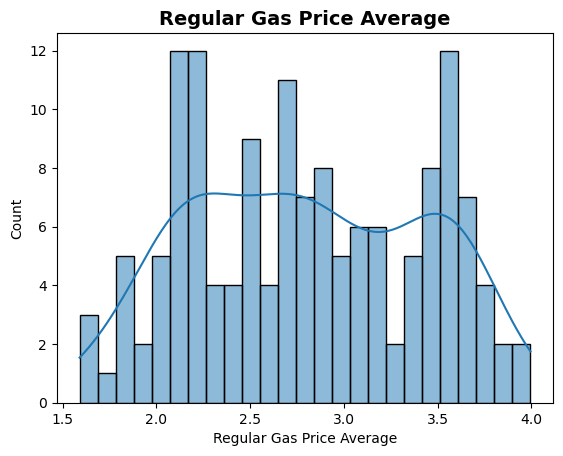

In [189]:
# Histogram for Regular Gas Price Average which is an independent variable
sns.histplot(data=df, x=df['Regular Gas Price Average'], kde=True, bins=25, element="bars")
plt.title("Regular Gas Price Average", fontsize=14, fontweight='bold')
plt.show()

In [213]:
df["Regular Gas Price Average"].kurt()

-1.1138963533716149

In [215]:
df["Regular Gas Price Average"].skew()

0.03347789737537622

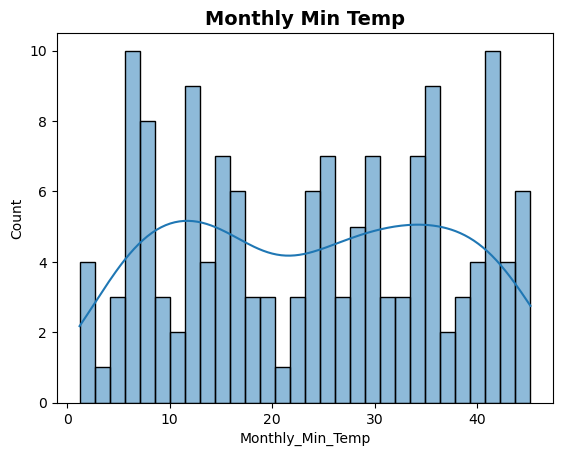

In [173]:
# Histogram for Monthly Minimum Temp which is an independent variable
sns.histplot(data=df, x=df['Monthly_Min_Temp'], kde=True, bins=30, element="bars")
plt.title("Monthly Min Temp", fontsize=14, fontweight='bold')
plt.show()

In [217]:
df["Monthly_Min_Temp"].kurt()

-1.3023763929648215

In [219]:
df["Monthly_Min_Temp"].skew()

-0.005994346762926201

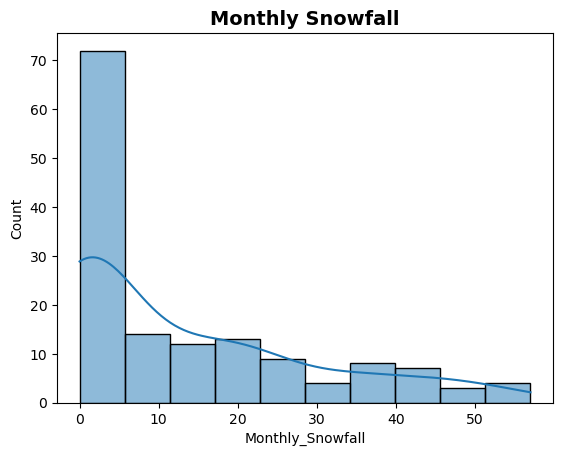

In [153]:
# Histogram for Monthly Snowfall which is an independent variable
sns.histplot(data=df, x=df['Monthly_Snowfall'], kde=True, bins=10, element="bars")
plt.title("Monthly Snowfall", fontsize=14, fontweight='bold')
plt.show()

In [221]:
df["Monthly_Snowfall"].kurt()

0.1369040985585266

In [223]:
df["Monthly_Snowfall"].skew()

1.095048329797924

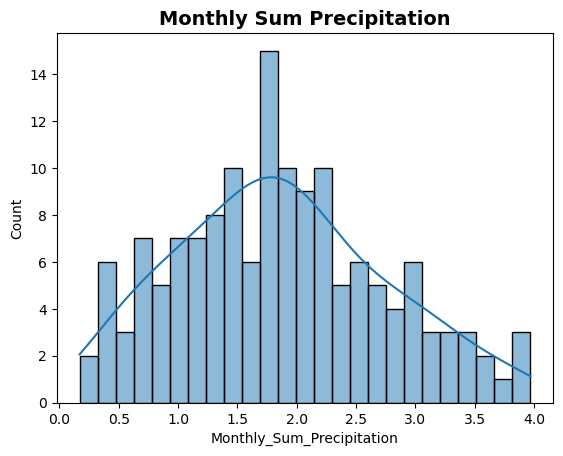

In [179]:
# Histogram for Monthly Sum Precipitation which is an independent variable
sns.histplot(data=df, x=df['Monthly_Sum_Precipitation'], kde=True, bins=25, element="bars")
plt.title("Monthly Sum Precipitation", fontsize=14, fontweight='bold')
plt.show()

In [225]:
df["Monthly_Sum_Precipitation"].kurt()

-0.4639077846217101

In [227]:
df["Monthly_Sum_Precipitation"].skew()

0.2806363248683508

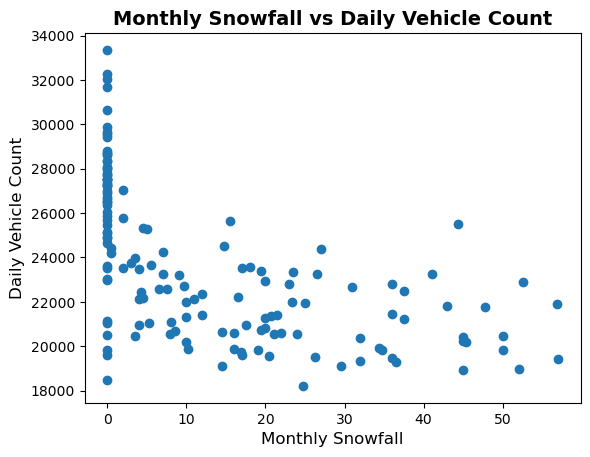

In [235]:
#Scatterplot Monthly Snowfall vs Daily Vehicle Count
plt.scatter(x=df['Monthly_Snowfall'], y=df['Daily Vehicle Count'])
plt.title('Monthly Snowfall vs Daily Vehicle Count', fontsize=14, fontweight='bold')
plt.xlabel("Monthly Snowfall", fontsize=12)
plt.ylabel("Daily Vehicle Count", fontsize=12)
plt.show()

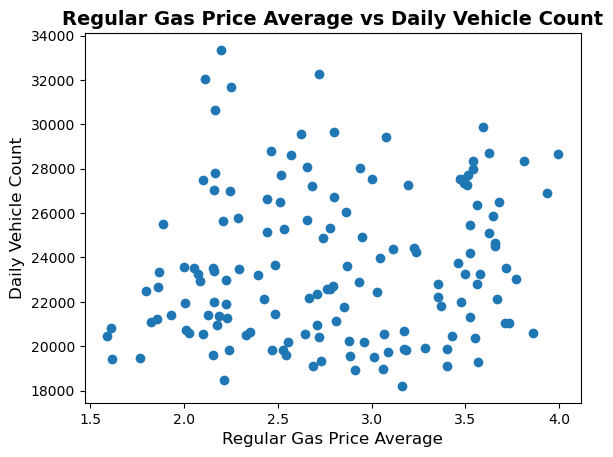

In [237]:
#Scatterplot Monthly Snowfall vs Daily Vehicle Count
plt.scatter(x=df['Regular Gas Price Average'], y=df['Daily Vehicle Count'])
plt.title('Regular Gas Price Average vs Daily Vehicle Count', fontsize=14, fontweight='bold')
plt.xlabel("Regular Gas Price Average", fontsize=12)
plt.ylabel("Daily Vehicle Count", fontsize=12)
plt.show()

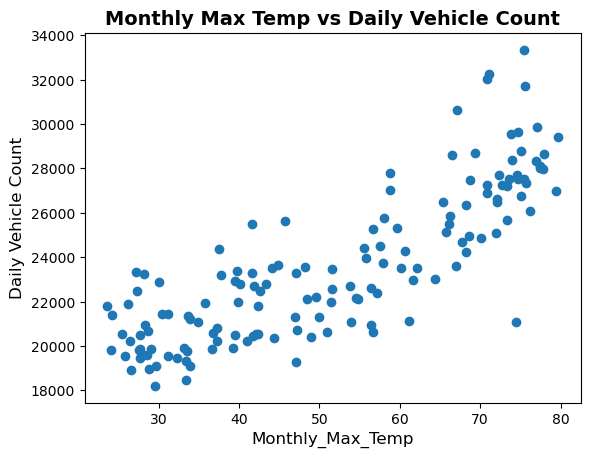

In [239]:
#Scatterplot Monthly Snowfall vs Daily Vehicle Count
plt.scatter(x=df['Monthly_Max_Temp'], y=df['Daily Vehicle Count'])
plt.title('Monthly Max Temp vs Daily Vehicle Count', fontsize=14, fontweight='bold')
plt.xlabel("Monthly_Max_Temp", fontsize=12)
plt.ylabel("Daily Vehicle Count", fontsize=12)
plt.show()

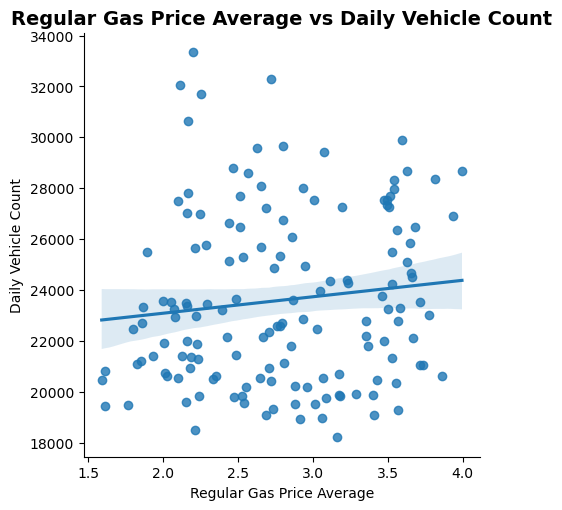

In [123]:
sns.lmplot(x = 'Regular Gas Price Average',y = "Daily Vehicle Count", data=df)
plt.title("Regular Gas Price Average vs Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

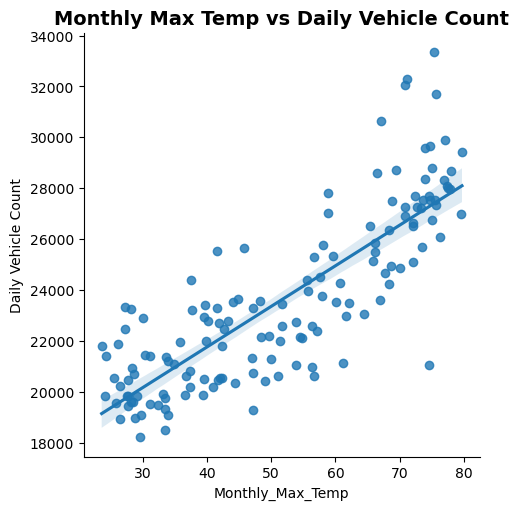

In [127]:
sns.lmplot(x = 'Monthly_Max_Temp',y = "Daily Vehicle Count", data=df)
plt.title("Monthly Max Temp vs Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

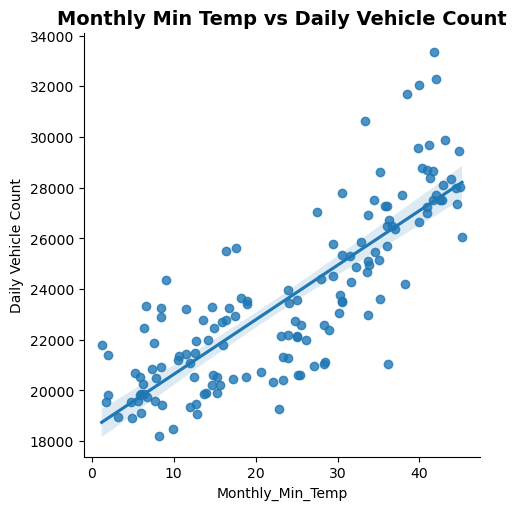

In [129]:
sns.lmplot(x = 'Monthly_Min_Temp',y = "Daily Vehicle Count", data=df)
plt.title("Monthly Min Temp vs Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

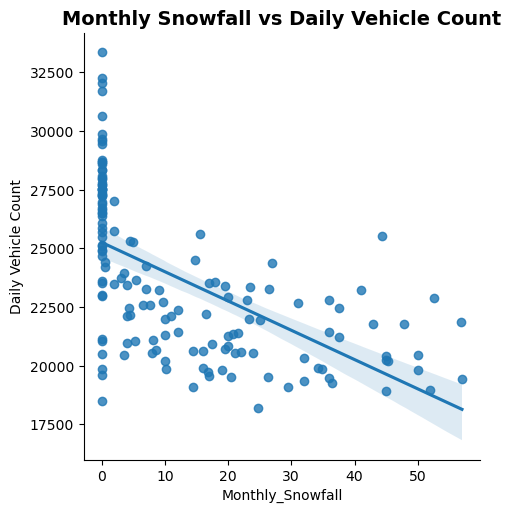

In [131]:
sns.lmplot(x = 'Monthly_Snowfall',y = "Daily Vehicle Count", data=df)
plt.title("Monthly Snowfall vs Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

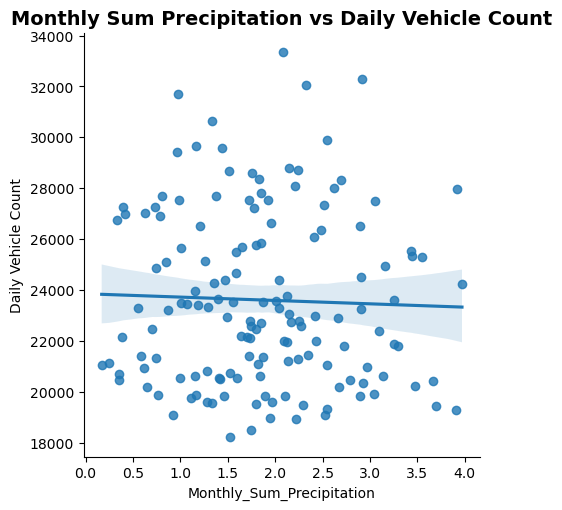

In [133]:
sns.lmplot(x = 'Monthly_Sum_Precipitation',y = "Daily Vehicle Count", data=df)
plt.title("Monthly Sum Precipitation vs Daily Vehicle Count", fontsize=14, fontweight='bold')
plt.show()

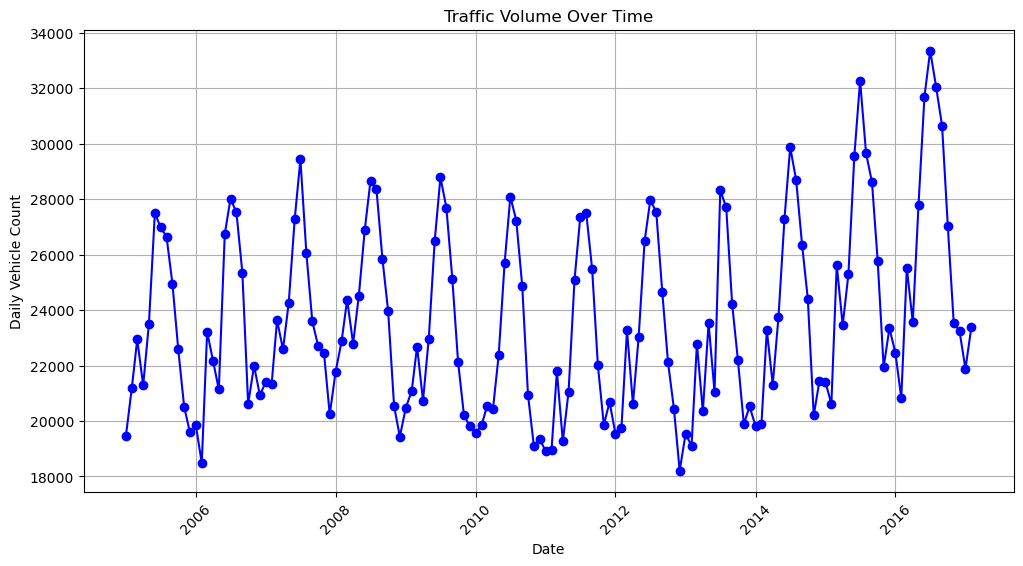

In [193]:
# Plot Daily Vehicle Count over time
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Daily Vehicle Count'], marker="o", linestyle="-", color="blue")

# Formatting
plt.xlabel("Date")
plt.ylabel("Daily Vehicle Count")
plt.title("Traffic Volume Over Time")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid()

plt.show()

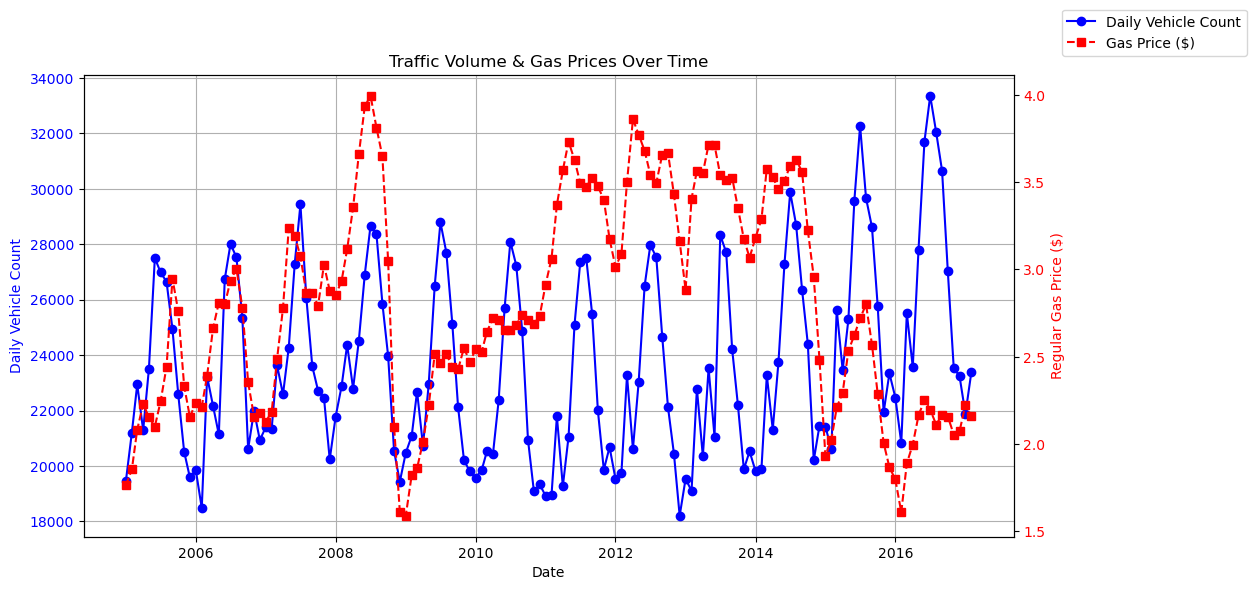

In [197]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Daily Vehicle Count on primary y-axis
ax1.plot(df.index, df['Daily Vehicle Count'], marker="o", linestyle="-", color="blue", label="Daily Vehicle Count")
ax1.set_xlabel("Date")
ax1.set_ylabel("Daily Vehicle Count", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid()

# Create secondary y-axis for Gas Price
ax2 = ax1.twinx()
ax2.plot(df.index, df['Regular Gas Price Average'], marker="s", linestyle="dashed", color="red", label="Gas Price ($)")
ax2.set_ylabel("Regular Gas Price ($)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and legend
plt.title("Traffic Volume & Gas Prices Over Time")
fig.legend(loc="upper right", bbox_to_anchor=(1.1, 1))

plt.show()


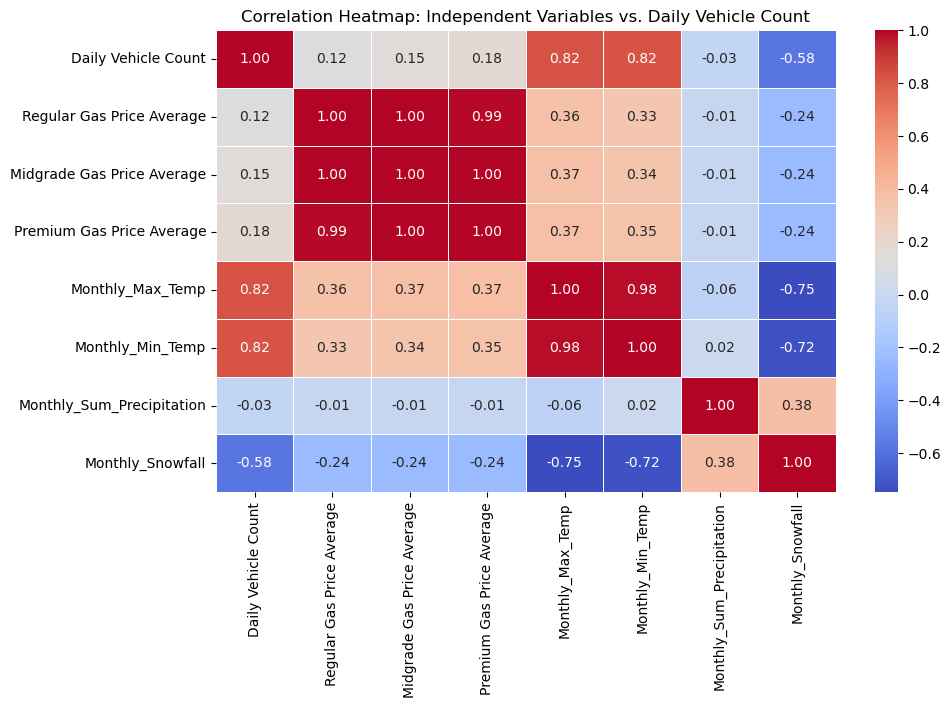

In [201]:
# Select only numerical independent variables + Daily Vehicle Count
corr_data = df[['Daily Vehicle Count', 'Regular Gas Price Average', 'Midgrade Gas Price Average', 
                'Premium Gas Price Average', 'Monthly_Max_Temp', 'Monthly_Min_Temp', 
                'Monthly_Sum_Precipitation', 'Monthly_Snowfall']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Set up figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Formatting
plt.title("Correlation Heatmap: Independent Variables vs. Daily Vehicle Count")

plt.show()


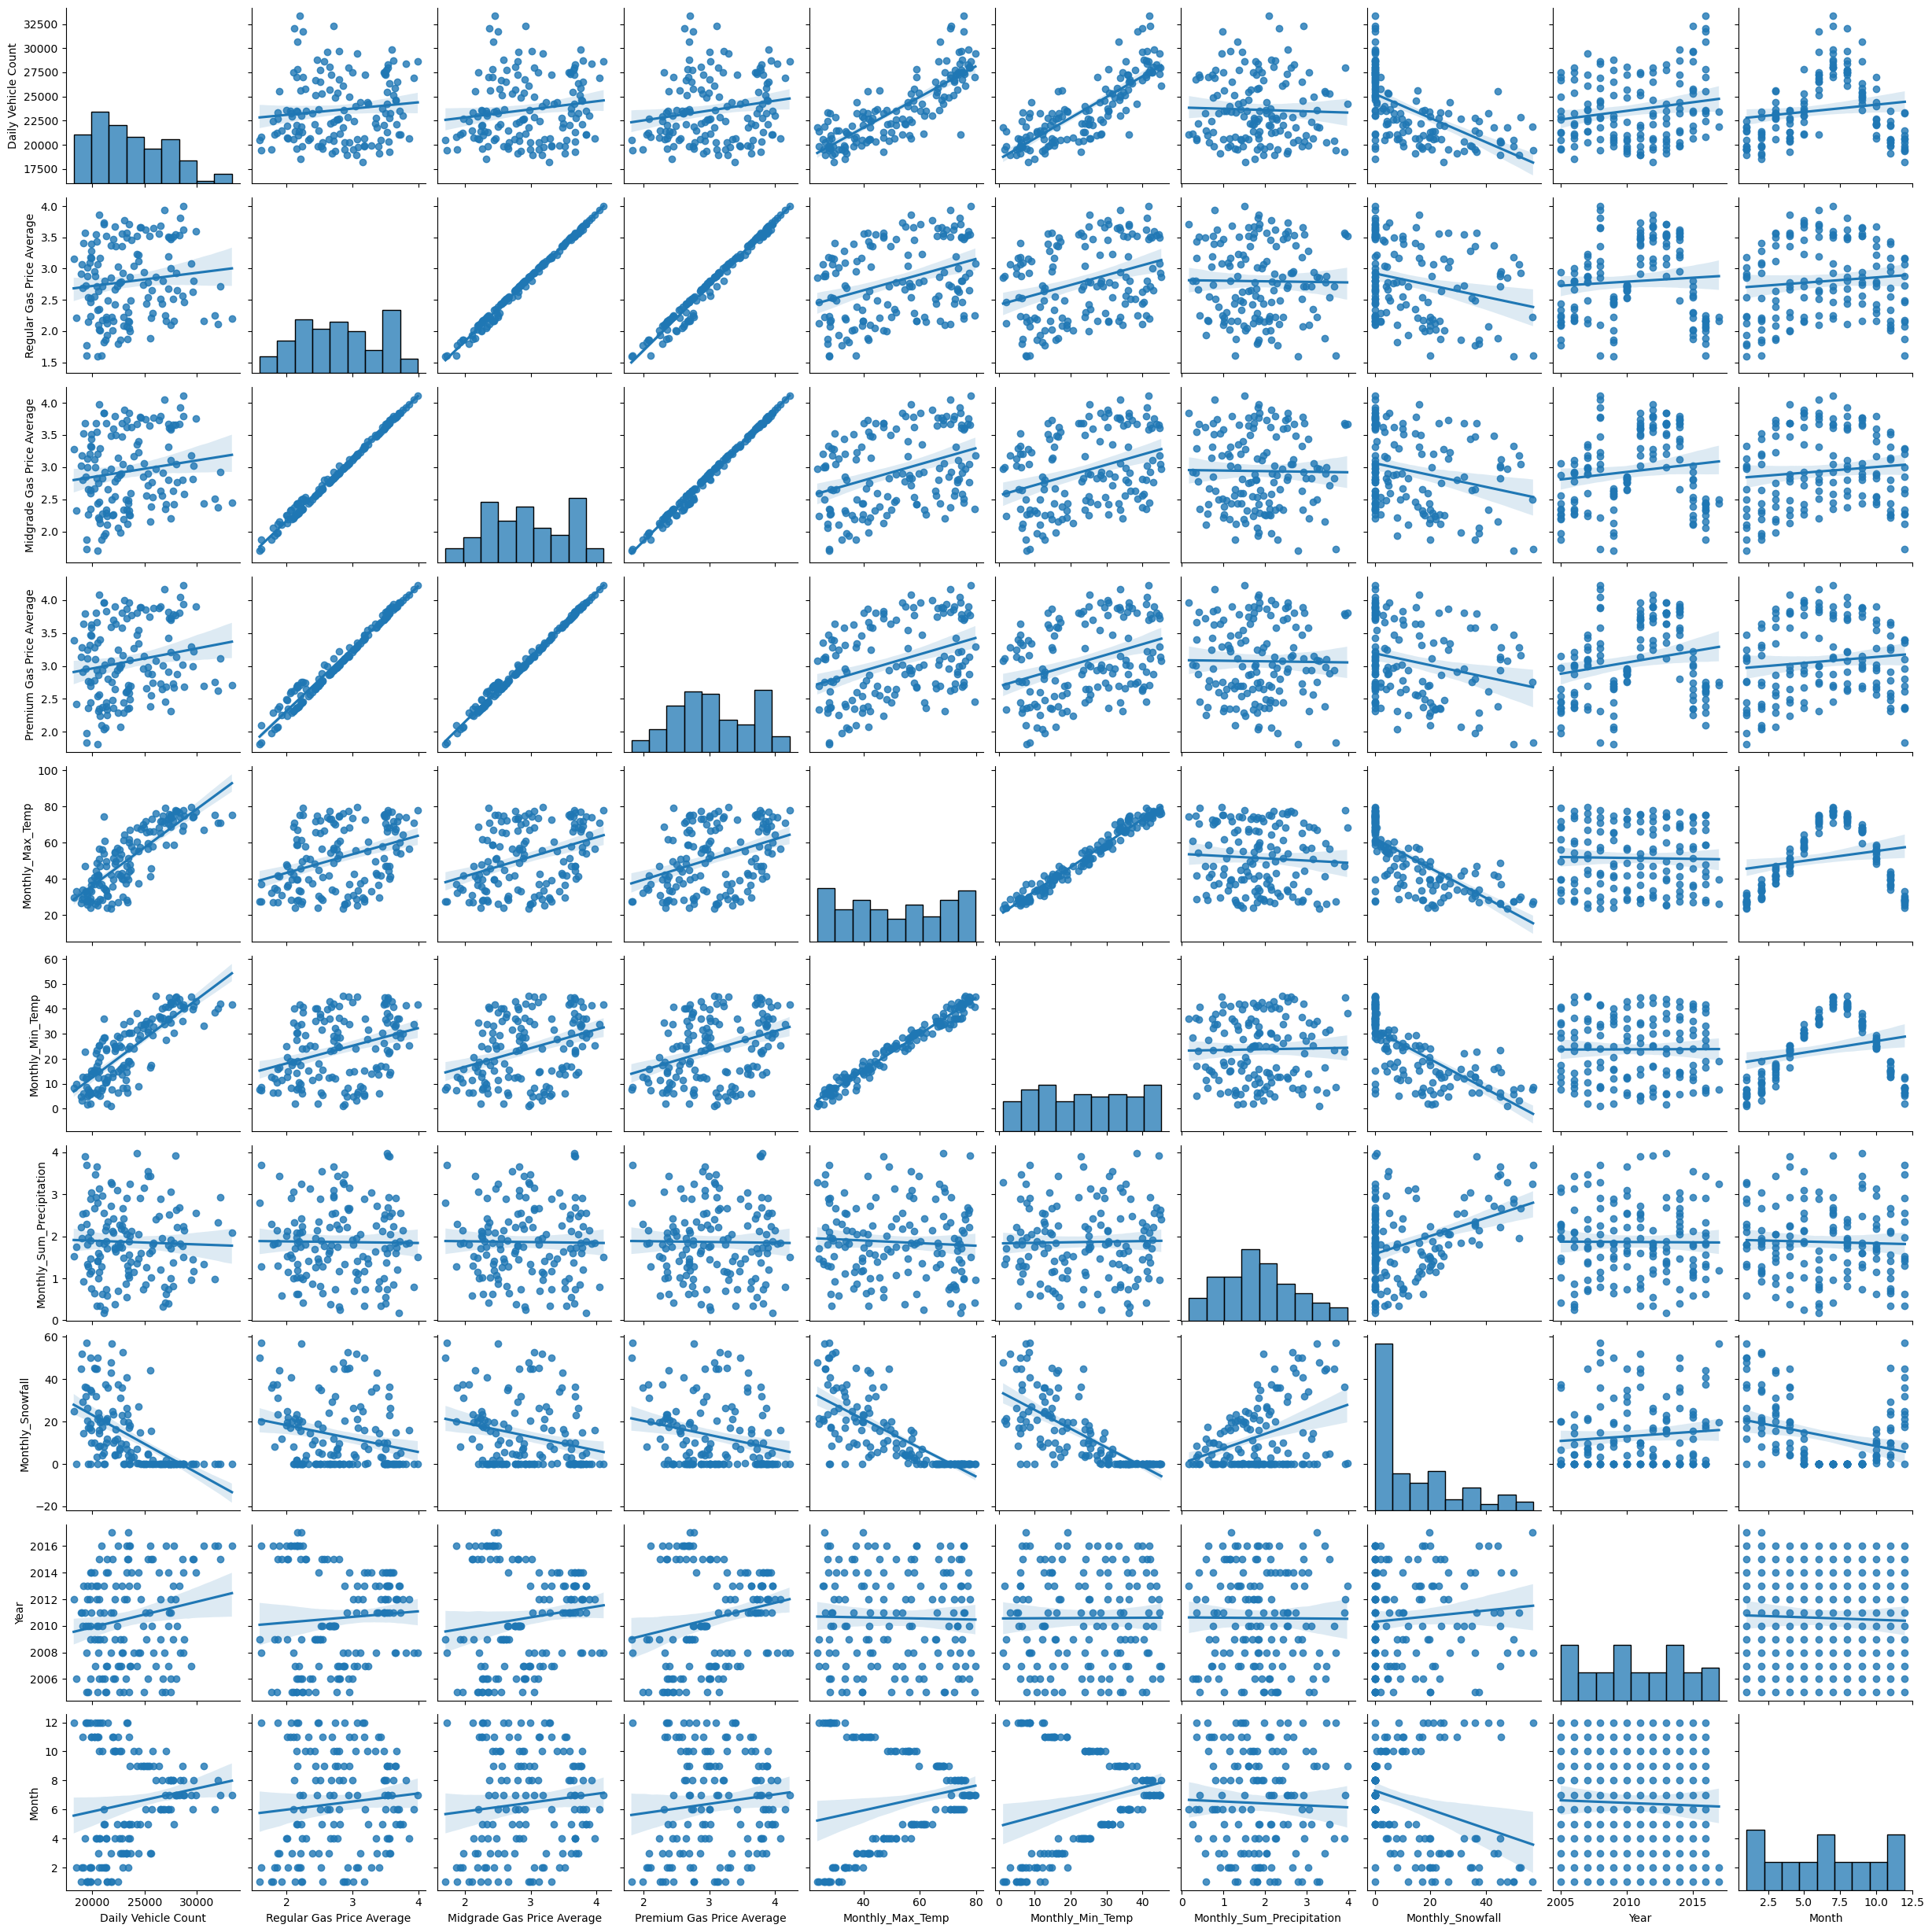

In [242]:
sns.pairplot(df, kind="reg")